In [0]:
!pip install -q keras

In [4]:
import keras

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.text import text_to_word_sequence
import re
from nltk.util import ngrams
import numpy as np
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Activation, Embedding, Dense, LSTM, Bidirectional
import pandas as pd
import os

def encode(data):
    encoded = to_categorical(data, num_classes = len(vocab))
    return encoded

In [6]:
from google.colab import files
uploaded = files.upload()

Saving news_summary.csv to news_summary.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded[r'news_summary.csv']), encoding ="ISO-8859-1")

In [8]:
data.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [9]:
data.isnull().sum()

author         0
date           0
headlines      0
read_more      0
text           0
ctext        118
dtype: int64

In [0]:
data = data.dropna()
data = data.drop(['author','date','headlines','read_more','ctext'], 1)
data = data.reset_index(drop=True)

In [11]:
data.head()

,text
0,The Administration of Union Territory Daman an...
1,Malaika Arora slammed an Instagram user who tr...
2,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Maharashtra will train their staff t...


In [12]:
data.isnull().sum()

text    0
dtype: int64

In [13]:
print(len(data))

4396


In [0]:
text=""
for x in range(0,600):
    text=text+" "+data.text[x]

In [15]:
anot=text
text=re.sub(r"[^a-zA-Z0-9. ]+", '', text)
text=text.split('. ')
tokenizer=Tokenizer()
tokenizer.fit_on_texts(text)
sents=tokenizer.texts_to_sequences(text)
#print(sents)
abar=text_to_word_sequence(anot)

vocab=set(abar)
#print('Unique words in the vocabulary: ',vocab)

print('Length of the vocabulary: ',len(vocab))

Length of the vocabulary:  7072


In [16]:
bigline=0;

for j in range(0,len(sents)):
    if(len(sents[j])>bigline):
        bigline=len(sents[j])
        
print('Length of the biggest line is: ',bigline)

Length of the biggest line is:  67


In [17]:
dum5=[]
dum6=[]

for k in range(0,len(sents)):
    dum1=[]
    dum3=[]
    for i in range(2,len(sents[k])+1):
        ngs=list(ngrams(sents[k], i))
        dum1.append(ngs[0])
    
    pads=pad_sequences(dum1,maxlen=bigline,value=0,padding='pre')
    #print('Padding of corresponding n-grams:')
    #print(pads)
    
    #print(dum1)
    
    dum2=(dum1[len(sents[k])-2])
    for l in range(1,len(dum2)):
        dum3.append(dum2[l])
    
    #print(dum2)
    labels=np.array(dum3)
    #print('Labels: ',labels)
    print('List:', list(labels))
    
    print('One Hot Encoding representation:')
    one_hot = encode(labels)
    print(one_hot)
    
    
    for u in range(0,len(sents[k])-1):
        dum4=np.delete(pads[u],bigline-1)
        dum5.append(list(dum4))
        dum6.append(list(one_hot[u]))

    fet=np.array(dum5)
    lev=np.array(dum6)

Streaming output truncated to the last 5000 lines.
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
List: [27, 1137, 1, 5854, 5855, 21, 1, 633, 356, 44, 27, 599, 3079, 6, 319, 2895, 81, 42, 1796, 1571, 2, 255, 3, 5856, 3, 35, 137, 10]
One Hot Encoding representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
List: [64, 35, 11, 79, 3, 5857, 4, 170, 1397, 65, 4, 1990, 1789, 2946, 5, 64, 912, 6, 126]
One Hot Encoding representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
List: [1966, 1, 1397, 31, 5858, 5, 244, 185, 6, 79, 57, 5, 5859]
One Hot Encoding representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. 

IndexError: ignored

In [18]:
fet.shape

(32866, 66)

In [19]:
lev.shape

(32866, 7072)

In [0]:
model = Sequential()
model.add(Embedding(len(vocab), 100, input_length=bigline-1))

In [0]:
model.add(LSTM(100, return_sequences=True))

In [0]:
model.add(Bidirectional(LSTM(100)))

In [0]:
model.add(Flatten())

In [0]:
model.add((Dense(len(vocab),activation='softmax')))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(fet,lev,epochs=200)

Epoch 1/200
1028/1028 [==============================] - 20s 19ms/step - loss: 7.4559 - accuracy: 0.0513
Epoch 2/200
1028/1028 [==============================] - 20s 19ms/step - loss: 6.9620 - accuracy: 0.0612
Epoch 3/200
1028/1028 [==============================] - 19s 19ms/step - loss: 6.7220 - accuracy: 0.0716
Epoch 4/200
1028/1028 [==============================] - 19s 19ms/step - loss: 6.4723 - accuracy: 0.0869
Epoch 5/200
1028/1028 [==============================] - 19s 19ms/step - loss: 6.2355 - accuracy: 0.1006
Epoch 6/200
1028/1028 [==============================] - 20s 19ms/step - loss: 6.0196 - accuracy: 0.1108
Epoch 7/200
1028/1028 [==============================] - 20s 19ms/step - loss: 5.7977 - accuracy: 0.1214
Epoch 8/200
1028/1028 [==============================] - 19s 19ms/step - loss: 5.5872 - accuracy: 0.1295
Epoch 9/200
1028/1028 [==============================] - 20s 19ms/step - loss: 5.3706 - accuracy: 0.1396
Epoch 10/200
1028/1028 [==============================]

Text(0, 0.5, 'accuracy')

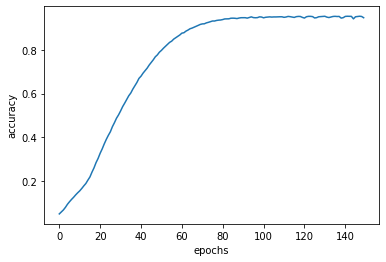

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

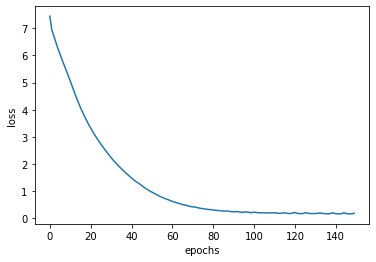

In [41]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [0]:
nam = "Seventeen-time Grand Slam champion Switzerland's Roger Federer overcame"
nam=nam.split('. ')

In [2]:
for it in range(0,30):
    print(nam[0])
    nam1=nam[0]
    nam1=nam1.split('. ')
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(nam1)
    namsen =tokenizer.texts_to_sequences(nam1)
    print(namsen)
    npad=pad_sequences(namsen,maxlen=bigline-1,value=0,padding='pre')
    newpre = model.predict_classes(npad,verbose=0)[0]
    nwwrd=abar[newpre]
    
    print(nwwrd)
    
    nam[0]+=' '+nwwrd

Seventeen-time Grand Slam champion Switzerland's Roger Federer overcame


NameError: ignored